In [9]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [1]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

test=pd.read_csv('./data/1pctWPPbySingleAgeSex.csv',low_memory=False)
test.shape

(22740, 21)

In [2]:
df = pd.read_csv('./data/1pctWPPbySingleAgeSex.csv',low_memory=False)
df.head()

,Unnamed: 0,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,...,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,169702,25,1518,NaN,NaN,NaN,NaN,13,Income group,1802,...,2,Medium,2043,2043,22,22,1,0.650,0.623,1.273
1,616068,82,430,NaN,LBR,LR,430.0,4,Country/Area,914,...,2,Medium,2038,2038,69,69,1,0.135,0.159,0.294
2,1545316,199,442,NaN,LUX,LU,442.0,4,Country/Area,926,...,2,Medium,2075,2075,16,16,1,0.463,0.441,0.904
3,1238584,160,924,NaN,NaN,NaN,154.0,3,Subregion,908,...,2,Medium,2040,2040,21,21,1,0.555,0.531,1.086
4,1242431,160,924,NaN,NaN,NaN,154.0,3,Subregion,908,...,2,Medium,2078,2078,30,30,1,0.561,0.540,1.101


In [3]:
from pycaret.regression import *
reg = setup(test,target = 'PopFemale', session_id=22)

,Description,Value
0,Session id,22
1,Target,PopFemale
2,Target type,Regression
3,Original data shape,"(22740, 21)"
4,Transformed data shape,"(22740, 27)"
5,Transformed train set shape,"(15917, 27)"
6,Transformed test set shape,"(6823, 27)"
7,Numeric features,13
8,Categorical features,7
9,Rows with missing values,78.7%


In [4]:
lightgbm = create_model('lightgbm')
lightgbm

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0051,0.0001,0.0083,0.9988,0.0052,0.0295
1,0.0056,0.0001,0.0107,0.9981,0.0061,0.0250
2,0.0053,0.0001,0.0110,0.9980,0.0074,0.0326
3,0.0058,0.0002,0.0128,0.9974,0.0076,0.0376
4,0.0054,0.0001,0.0109,0.9979,0.0064,0.0326
5,0.0058,0.0003,0.0176,0.9952,0.0096,0.0306
6,0.0054,0.0001,0.0105,0.9982,0.0063,0.0270
7,0.0057,0.0001,0.0114,0.9979,0.0064,0.0240
8,0.0054,0.0001,0.0095,0.9985,0.0062,0.0321


LGBMRegressor(n_jobs=-1, random_state=22)

In [5]:
tuned_lightgbm= tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0059,0.0001,0.0101,0.9982,0.0063,0.0359
1,0.0060,0.0002,0.0133,0.9970,0.0067,0.0279
2,0.0056,0.0002,0.0132,0.9971,0.0086,0.0404
3,0.0068,0.0003,0.0162,0.9959,0.0090,0.0378
4,0.0062,0.0002,0.0123,0.9974,0.0068,0.0354
5,0.0066,0.0004,0.0194,0.9942,0.0104,0.0341
6,0.0057,0.0001,0.0118,0.9977,0.0070,0.0281
7,0.0059,0.0001,0.0122,0.9976,0.0065,0.0271
8,0.0054,0.0001,0.0093,0.9986,0.0061,0.0377


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [6]:
final_lightgbm= finalize_model(tuned_lightgbm)

In [7]:
final_lightgbm

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Unnamed: 0', 'SortOrder', 'LocID',
                                             'SDMX_code', 'LocTypeID',
                                             'ParentID', 'VarID', 'Time',
                                             'MidPeriod', 'AgeGrpStart',
                                             'AgeGrpSpan', 'PopMale',
                                             'PopTotal'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Notes', 'ISO3_code', 'ISO2_code',...
                ('rest_encoding',
                 TransformerWrapper(include=['Notes', 'ISO3_code', 'ISO2_code',
                                             'Location', 'AgeGrp'],
                                    transformer=TargetEncoder(cols=['Notes',
                                                                    'ISO3_code',
                                                                    'ISO2_code',
                                                                    'Location',
                                                                    'AgeGrp'],
                                                              handle_missing='return_nan'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 LGBMRegressor(n_jobs=-1, random_state=22))])

In [9]:
test.isna().sum()   #If data.isna().sum() results in a value of 0, it means that there are no missing values in the data.
#this is a good situation because missing values can affect the results of data analysis and modeling, 
#and the absence of missing values means that your data is relatively clean in this regard and does not require additional processing to deal with missing values.

Unnamed: 0         0
SortOrder          0
LocID              0
Notes          16900
ISO3_code       3805
ISO2_code       3886
SDMX_code        291
LocTypeID          0
LocTypeName        0
ParentID           0
Location           0
VarID              0
Variant            0
Time               0
MidPeriod          0
AgeGrp             0
AgeGrpStart        0
AgeGrpSpan         0
PopMale            0
PopFemale          0
PopTotal           0
dtype: int64

In [10]:
# checking to see if R-sq is close in both Train and Test
evaluate_model(final_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [12]:
predictions = predict_model(estimator= final_lightgbm,data = test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0045,0.0001,0.0078,0.9990,0.0048,0.0263


In [13]:
predictions['preds']= np.int32(np.round(predictions['prediction_label']))#小数点进阶必须要用到np可以把表上的数据新添加一个列然后变成整数
predictions.drop('prediction_label', axis=1, inplace =True)

In [14]:
predictions

,Unnamed: 0,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,...,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopTotal,PopFemale,preds
0,169702,25,1518,NaN,NaN,NaN,NaN,13,Income group,1802,...,Medium,2043,2043,22,22,1,0.650,1.273,0.623,1
1,616068,82,430,NaN,LBR,LR,430.0,4,Country/Area,914,...,Medium,2038,2038,69,69,1,0.135,0.294,0.159,0
2,1545316,199,442,NaN,LUX,LU,442.0,4,Country/Area,926,...,Medium,2075,2075,16,16,1,0.463,0.904,0.441,0
3,1238584,160,924,NaN,NaN,NaN,154.0,3,Subregion,908,...,Medium,2040,2040,21,21,1,0.555,1.086,0.531,1
4,1242431,160,924,NaN,NaN,NaN,154.0,3,Subregion,908,...,Medium,2078,2078,30,30,1,0.561,1.101,0.540,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22735,864444,113,462,NaN,MDV,MV,462.0,4,Country/Area,5501,...,Medium,2048,2048,86,86,1,0.165,0.313,0.148,0
22736,1572730,203,904,NaN,NaN,NaN,419.0,2,Geographic region,1840,...,Medium,2030,2030,59,59,1,0.491,1.030,0.539,1
22737,1033275,134,268,12,GEO,GE,268.0,4,Country/Area,922,...,Medium,2061,2061,45,45,1,0.774,1.508,0.734,1
22738,622252,82,430,NaN,LBR,LR,430.0,4,Country/Area,914,...,Medium,2099,2099,92,92,1,0.016,0.047,0.031,0


In [15]:
predictions['residuals'] = predictions['PopFemale'] - predictions['preds']
predictions

,Unnamed: 0,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,...,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopTotal,PopFemale,preds,residuals
0,169702,25,1518,NaN,NaN,NaN,NaN,13,Income group,1802,...,2043,2043,22,22,1,0.650,1.273,0.623,1,-0.377
1,616068,82,430,NaN,LBR,LR,430.0,4,Country/Area,914,...,2038,2038,69,69,1,0.135,0.294,0.159,0,0.159
2,1545316,199,442,NaN,LUX,LU,442.0,4,Country/Area,926,...,2075,2075,16,16,1,0.463,0.904,0.441,0,0.441
3,1238584,160,924,NaN,NaN,NaN,154.0,3,Subregion,908,...,2040,2040,21,21,1,0.555,1.086,0.531,1,-0.469
4,1242431,160,924,NaN,NaN,NaN,154.0,3,Subregion,908,...,2078,2078,30,30,1,0.561,1.101,0.540,1,-0.460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22735,864444,113,462,NaN,MDV,MV,462.0,4,Country/Area,5501,...,2048,2048,86,86,1,0.165,0.313,0.148,0,0.148
22736,1572730,203,904,NaN,NaN,NaN,419.0,2,Geographic region,1840,...,2030,2030,59,59,1,0.491,1.030,0.539,1,-0.461
22737,1033275,134,268,12,GEO,GE,268.0,4,Country/Area,922,...,2061,2061,45,45,1,0.774,1.508,0.734,1,-0.266
22738,622252,82,430,NaN,LBR,LR,430.0,4,Country/Area,914,...,2099,2099,92,92,1,0.016,0.047,0.031,0,0.031


In [16]:
predictions['respct']= 1- (predictions['preds']/predictions['PopFemale'])
predictions

,Unnamed: 0,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,...,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopTotal,PopFemale,preds,residuals,respct
0,169702,25,1518,NaN,NaN,NaN,NaN,13,Income group,1802,...,2043,22,22,1,0.650,1.273,0.623,1,-0.377,-0.605136
1,616068,82,430,NaN,LBR,LR,430.0,4,Country/Area,914,...,2038,69,69,1,0.135,0.294,0.159,0,0.159,1.000000
2,1545316,199,442,NaN,LUX,LU,442.0,4,Country/Area,926,...,2075,16,16,1,0.463,0.904,0.441,0,0.441,1.000000
3,1238584,160,924,NaN,NaN,NaN,154.0,3,Subregion,908,...,2040,21,21,1,0.555,1.086,0.531,1,-0.469,-0.883239
4,1242431,160,924,NaN,NaN,NaN,154.0,3,Subregion,908,...,2078,30,30,1,0.561,1.101,0.540,1,-0.460,-0.851852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22735,864444,113,462,NaN,MDV,MV,462.0,4,Country/Area,5501,...,2048,86,86,1,0.165,0.313,0.148,0,0.148,1.000000
22736,1572730,203,904,NaN,NaN,NaN,419.0,2,Geographic region,1840,...,2030,59,59,1,0.491,1.030,0.539,1,-0.461,-0.855288
22737,1033275,134,268,12,GEO,GE,268.0,4,Country/Area,922,...,2061,45,45,1,0.774,1.508,0.734,1,-0.266,-0.362398
22738,622252,82,430,NaN,LBR,LR,430.0,4,Country/Area,914,...,2099,92,92,1,0.016,0.047,0.031,0,0.031,1.000000


<Axes: xlabel='residuals', ylabel='Count'>

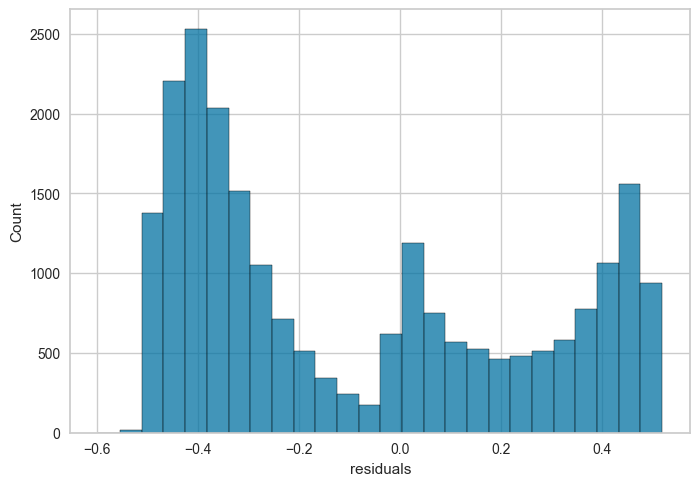

In [17]:
sns.histplot(data = predictions, x='residuals')

In [ ]:
#comclution